Данные были взяты из следующего источника: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

#### Описание переменных: 

- Винодельня (в какой конкретно винодельне был собран виноград и произведено само вино) \t
- Название вина (марка и 
- Год сбора винограда
- Рейтинг вина
- Количество отзывов
- Страна сбора (однако далее она была дропнута, так как рассматриваются вина исключительно из Испании) 
- Регион производства 
- Цена (в евро) 
- Тип вина (ну как с пивом - IPA, PILSNER, Weitzen и т.д.) 
- Оценка насыщенности (подразумевается богатство и тяжесть вина во рту) 
- Кислотность (параметр, определяющий ощущение кислотности вина) 

## Часть 1: Сбор и предварительная обработка данных

Импортируем базовые библиотеки. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [2]:
df = pd.read_csv('wines_SPA.csv') # Считываем датасет.
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.info() # Ищем нулевые значения в колонках датасета, смотрим на типы данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df['year'].unique() # Смотрим на проблемы с уникальными значениями year 

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [5]:
df['year'].fillna(int(df['year'].mode()), inplace = True) # Заполнили отсутствующие годы модой. Не использовали 
# медиану, так как нам важно было, чтобы мода не изменилась вследствие таких преобразований.

In [6]:
df = df.replace('N.V.', int(df['year'].mode())) # Заполнили отсутствующие годы модой. Не использовали медиану, так как нам 
# важно было, чтобы мода не изменилась вследствие таких преобразований

In [7]:
df = df.astype({'year': 'int'}) # Переводим переменную "year" из object в int для последующего построения графиков. 

In [8]:
df = df.astype({'price': 'int'}) # Переводим цены в int.

In [9]:
df.drop(columns = 'country', inplace = True)

In [10]:
df.info() # Смотрим на данные после изменений. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int64  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   int64  
 7   type         6955 non-null   object 
 8   body         6331 non-null   float64
 9   acidity      6331 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 586.1+ KB


In [11]:
df['body'] = df['body'].fillna(df['body'].median()) # Заполнили отсутсвующие body медианой

df['acidity'] = df['acidity'].fillna(df['acidity'].median()) # Заполнили отсутствующие acidity медианой

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   int64  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   int64  
 7   type         6955 non-null   object 
 8   body         7500 non-null   float64
 9   acidity      7500 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 586.1+ KB


In [13]:
df['type'] = df['type'].fillna(df['type'].mode()[0]) # Заменяем на моду тип вина. 

In [14]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778,Ribera Del Duero Red,5.0,3.0


## Часть 2: Визуализация

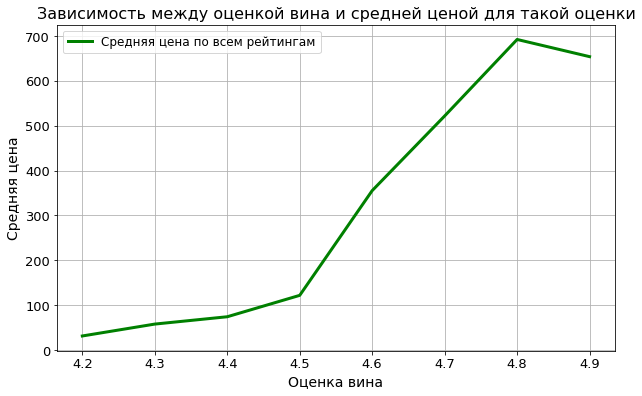

In [15]:
df_prices = df.groupby('rating')['price'].mean() 
df_prices_mean = df_prices.to_frame()

df_prices_mean.loc[df_prices_mean['price'] <= 0, 'price'] = df_prices[df_prices > 0].mean()

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x=df_prices.index, y=df_prices.values, color='green', 
             linewidth=3, label='Средняя цена по всем рейтингам')

ax.set_xlabel('Оценка вина', fontsize=14)
ax.set_ylabel('Средняя цена', fontsize=14)
ax.set_title('Зависимость между оценкой вина и средней ценой для такой оценки', fontsize=16)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(fontsize=12)

ax.grid()

plt.show()

Исходя из данного графика можем сделать вывод, что при увеличении рейтинга вина (значит и оценки его качества) средняя цена на вино имеет тенденцию к росту. 

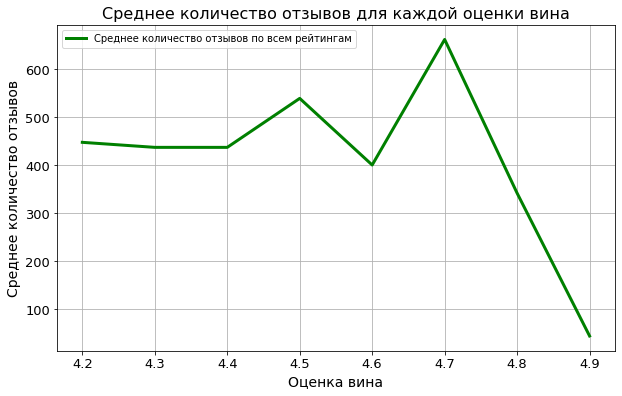

In [16]:
df_new = df.groupby('rating')['num_reviews'].mean()

plt.figure(figsize=(10,6)) 

sns.lineplot(data=df_new, linewidth=3, color='green',
             label='Среднее количество отзывов по всем рейтингам')

plt.title('Среднее количество отзывов для каждой оценки вина', fontsize=16)
plt.xlabel('Оценка вина', fontsize=14)
plt.ylabel('Среднее количество отзывов', fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(fontsize=12)

plt.grid()

plt.show()

Для вина с оценкой от 4.2 до 4.7 наблюдается примерно постоянное (с небольшими отклонениями) количество отзывов, однако начиная с оценки 4.7 до 4.9 включительно (во всём датасете нет ни одного вина с оценкой 5) среднее количество отзывов начинает резко уменьшаться и стремится к нулю. Из вышеприведенных умозаключений можно сделать вывод, что более дорогое вино (соответственно более высокое по рейтингу) покупают реже, а значит и реже оставляют на него отзывы.

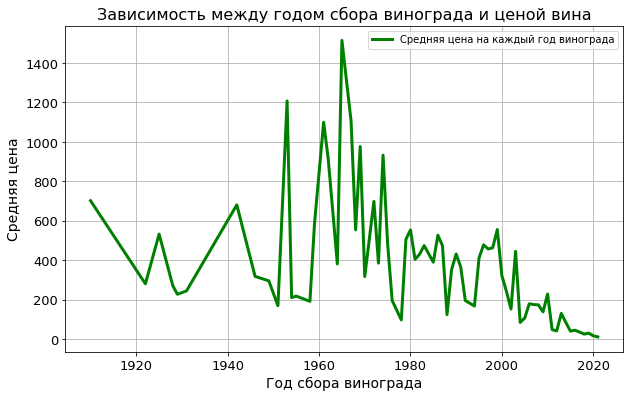

In [17]:
df_year = df.groupby('year')['price'].mean()

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_year, linewidth=3, color='green',
             label='Средняя цена на каждый год винограда')

plt.xlabel('Год сбора винограда', fontsize=14)
plt.ylabel('Средняя цена', fontsize=14)
plt.title('Зависимость между годом сбора винограда и ценой вина', fontsize=16)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(fontsize=12)

plt.grid()

plt.show()

Из данного графика тяжело сделать какие-либо существенные выводы. Однако можно сделать вывод, что в период (примерно) с 1945 по 1950 качество вина было достаточно высоко (следовательно, и цены достаточно высоки). То же самое можно сказать и с периодом с 1965 по (примерно) 1970 годы. Вероятно, это может быть связано с урожайностью винограда в данные периоды (данная информация будет проверена позже). Заметим, что с 1980 года средние цены на вино стали значительно падать и к 2020 году перестали превышать 200 евро. Важно отметить, что данная выборка учитывает исключительно испанские вина и, соответственно, конъюнктуру исключительно данного рынка красного вина. 

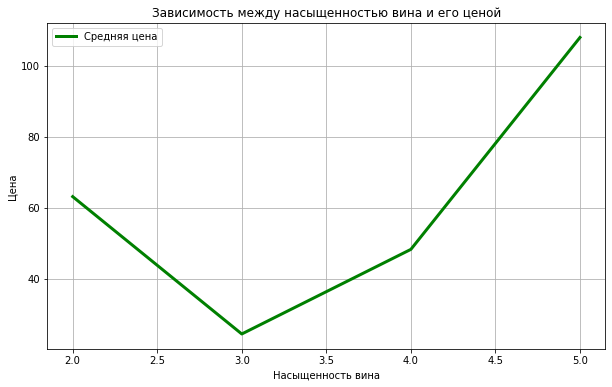

In [18]:
df_body = df.groupby('body')['price'].mean()

plt.figure(figsize=(10, 6))

plt.plot(df_body, color='green', linewidth=3, label='Средняя цена')

plt.xlabel('Насыщенность вина')
plt.ylabel('Цена')
plt.title('Зависимость между насыщенностью вина и его ценой')

plt.legend()
plt.grid()

plt.show()

Из данного графика можно сделать вывод, что насыщенность, которая равна трём, является наихудшей с точки зрения своей стоимости. Более высокая насыщенность способствует повышению цены вина.

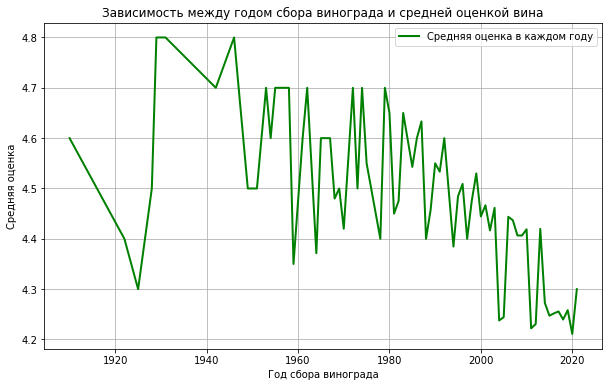

In [19]:
df_rate_year = df.groupby('year')['rating'].mean()

plt.figure(figsize=(10, 6))

plt.plot(df_rate_year, color='green', linewidth=2, label='Средняя оценка в каждом году')

plt.xlabel('Год сбора винограда')
plt.ylabel('Средняя оценка')
plt.title('Зависимость между годом сбора винограда и средней оценкой вина')

plt.legend()
plt.grid()

plt.show()

В целом можно сделать вывод, что с 1945 года (примерно) рейтинг вина начинает падать (в долгосрочной перспективе).

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


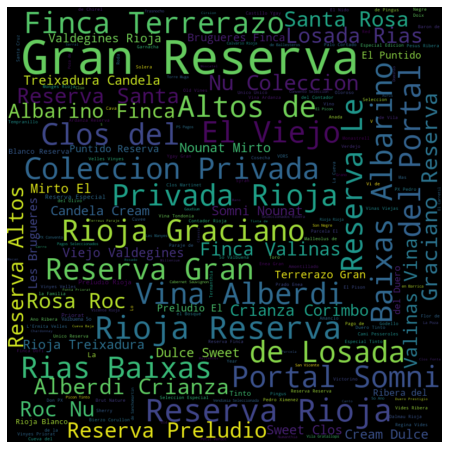

In [21]:
from wordcloud import WordCloud

wordcloud_hi = WordCloud(width=800, height=800, margin=0, 
                         background_color='black').generate(' '.join(df['wine']))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_hi, interpolation='bilinear')
plt.axis("off")

plt.show()

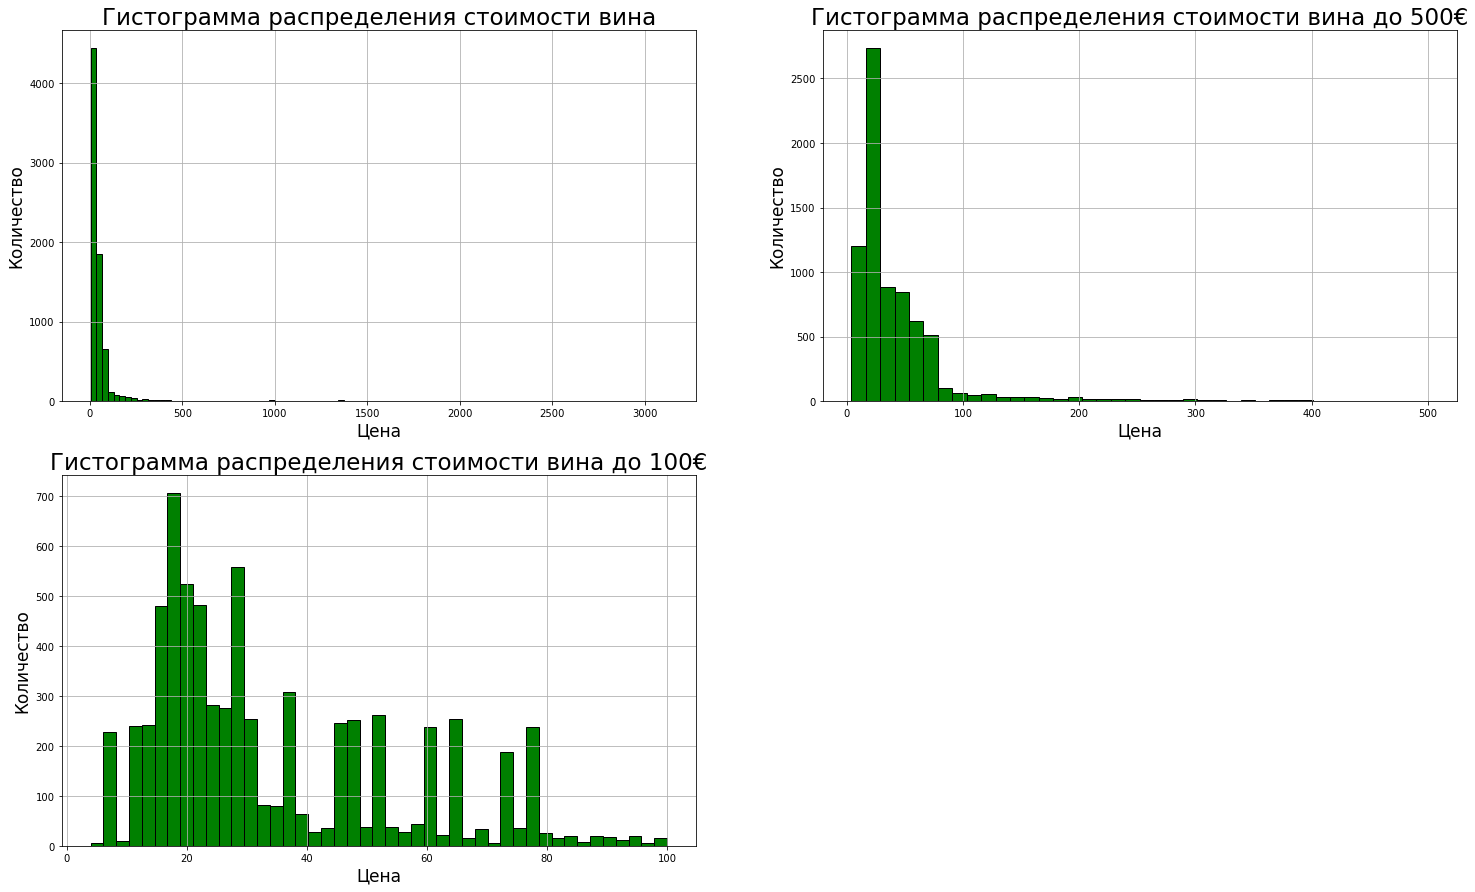

In [22]:
fig = plt.figure(figsize=(25, 15))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(df['price'], bins=100, color='green', edgecolor='black')

ax1.set_title('Гистограмма распределения стоимости вина', fontsize=23, color='black')
ax1.set_xlabel('Цена', fontsize=17, color='black')
ax1.set_ylabel('Количество', fontsize=17, color='black')

ax1.grid(True)

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(df[df['price'] <= 500]['price'], bins=40, color='green', edgecolor='black')

ax2.set_title('Гистограмма распределения стоимости вина до 500€', fontsize=23, color='black')
ax2.set_xlabel('Цена', fontsize=17, color='black')
ax2.set_ylabel('Количество', fontsize=17, color='black')

ax2.grid(True)

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(df[df['price'] <= 100]['price'], bins=45, color='green', edgecolor='black')

ax3.set_title('Гистограмма распределения стоимости вина до 100€', fontsize=23, color='black')
ax3.set_xlabel('Цена', fontsize=17, color='black')
ax3.set_ylabel('Количество', fontsize=17, color='black')

ax3.grid(True)

plt.show()

Мы рассмотрели в целом вина со всеми возможными ценами, а также вина до 500 евро и до 100 евро. Графики частично напоминают гиперболы (особенно первый). А вообще графики просто ужас, но мы всё же в гипотезах мы решили заюзать критерий Колмогорова и проверить можно ли описать стоимости вина экспоненциальным законом распределения.

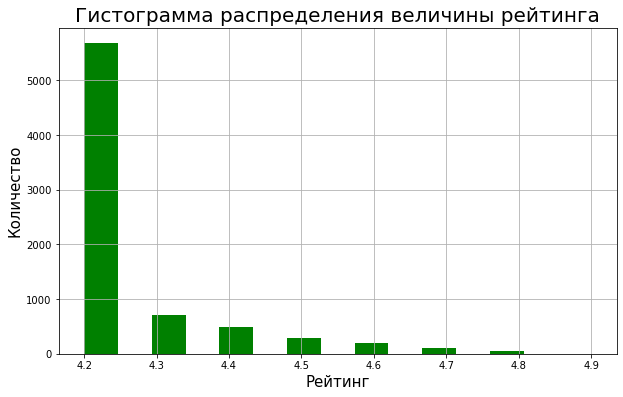

In [23]:
plt.figure(figsize = (10,6))

plt.title('Гистограмма распределения величины рейтинга', fontsize = 20, color = 'black')
plt.xlabel("Рейтинг", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')

plt.grid()

plt.hist(df['rating'], 15, color = 'green');

Заметим зависимость, что вин с относительно низким рейтингом гораздо больше чем вин с высоким. Значит по-настоящему хороших вин довольно мало.

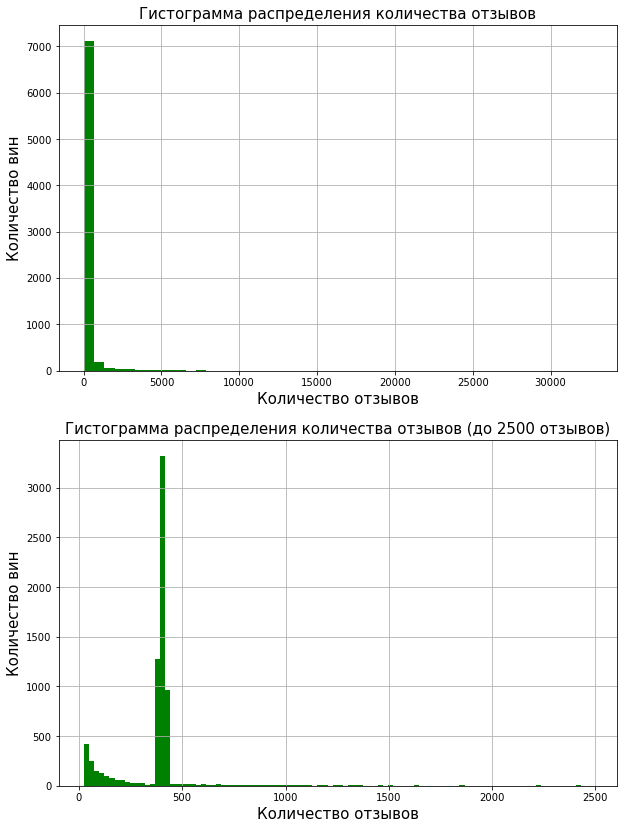

In [24]:
plt.figure(figsize = (10, 14))


plt.subplot(2,1,1)

plt.title('Гистограмма распределения количества отзывов', fontsize = 15, color = 'black')
plt.xlabel("Количество отзывов", fontsize = 15, color = 'black')
plt.ylabel("Количество вин", fontsize = 15, color = 'black')

plt.grid()
plt.hist(df['num_reviews'], 50, color = 'green');

plt.subplot(2,1,2)

plt.title('Гистограмма распределения количества отзывов (до 2500 отзывов)', fontsize = 15, color = 'black')
plt.xlabel("Количество отзывов", fontsize = 15, color = 'black')
plt.ylabel("Количество вин", fontsize = 15, color = 'black')

plt.grid()
plt.hist(df[df['num_reviews'] <= 2500]['num_reviews'], 100, color = 'green');

В среднем из графика видно, что количество отзывов на вино находится на уровне 450 отзывов для конкретной бутылки.

In [25]:
print('Действительно, в среднем имеется около 450 отзывов для бутылки', df['num_reviews'].mean())

Действительно, в среднем имеется около 450 отзывов для бутылки 451.10906666666665


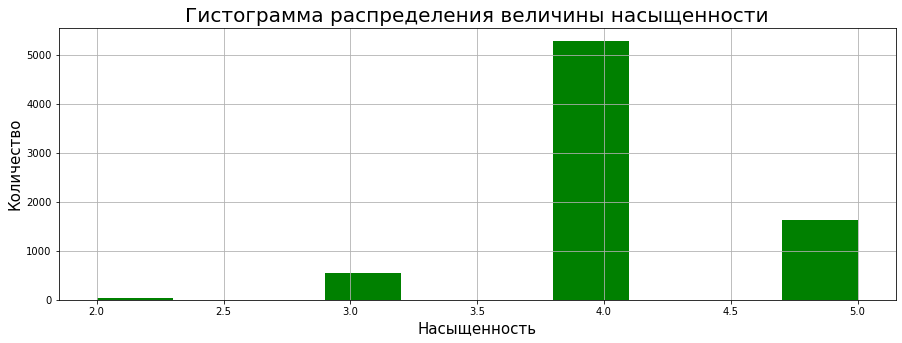

In [26]:
plt.figure(figsize = (15,5))

plt.title('Гистограмма распределения величины насыщенности', fontsize = 20, color = 'black')
plt.xlabel("Насыщенность", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')

plt.grid()

plt.hist(df['body'], 10, color = 'green');

Из данного графика можно увидеть, что преобладающее значение насыщенности вина равно 4, далее идет 5 и 3.

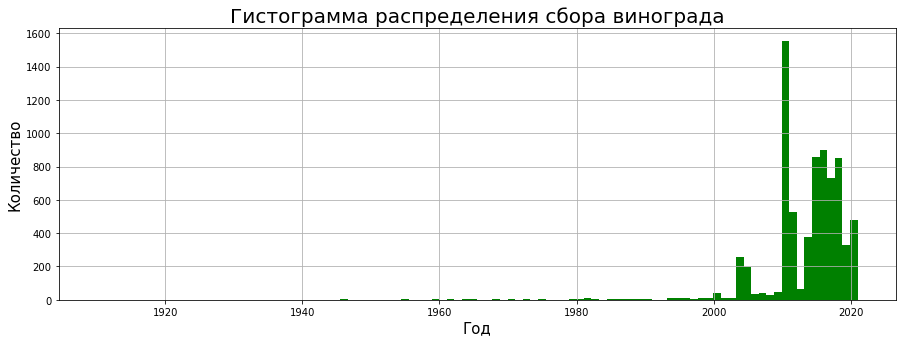

In [27]:
plt.figure(figsize = (15,5))

plt.title('Гистограмма распределения сбора винограда', fontsize = 20, color = 'black')
plt.xlabel("Год", fontsize = 15, color = 'black')
plt.ylabel("Количество", fontsize = 15, color = 'black')

plt.grid()
plt.hist(df['year'], 100, color = 'green');

Из данного графика можно увидеть, что, ориентируясь на наш датасет, наиболее активный сбор винограда пришелся на 2010-ые годы 21 века.

In [28]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Получаем координаты первой половины регионов

lt = (df['region'].unique())[:43]
from geopy.geocoders  import Nominatim

def get_coordinates(place): # Функция для получения координат места place
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(place)
    if location:
        return [location.latitude, location.longitude]
    else:
        return None

places = lt
coordinates = {}
for place in places:
    coords = get_coordinates(place)
    if coords:
        coordinates[place] = coords

print(coordinates)

{'Toro': [41.5216963, -5.3939824], 'Vino de Espana': [42.1771554, -8.4341104], 'Ribera del Duero': [41.6591121, -3.6815871170201557], 'Montilla-Moriles': [36.7286168, -4.3001727], 'Jumilla': [38.4735408, -1.3285417], 'Jerez-Xeres-Sherry': [36.65901315, -6.155439431926194], 'Priorato': [44.8741121, 10.1628956], 'Rioja': [42.2814642, -2.482804975070473], 'Bierzo': [42.65265025, -6.62318404217132], 'Castilla y Leon': [41.8037172, -4.7471726], 'Campo de Borja': [41.78654145, -1.5058322706803928], 'Cadiz': [36.5297438, -6.2928976], 'Cava': [42.31658175, 1.6111496867672197], 'Jerez Palo Cortado': [36.6954668, -6.1474169], 'Manzanilla': [37.3887479, -6.4316237], 'Valdeorras': [42.34834155, -6.9659982204038755], 'Emporda': [42.1893929, 3.077661284375413], 'Rioja Alta': [42.4157318, -2.87947386168831], 'Alicante': [38.3436365, -0.4881708], 'Somontano': [42.0883878, 0.09940412890672314], 'Ribeiro': [42.31990645, -8.152266856014716], 'Mallorca': [39.613432, 2.8829184529439633], 'Yecla': [38.61365

In [30]:
# Получаем координаты второй половины регионов

lt_2 = (df['region'].unique())[44:]

def get_coordinates_2(place): # Функция для получения координат места place
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(place)
    if location:
        return [location.latitude, location.longitude]
    else:
        return None

places = lt_2
coordinates_2 = {}
for place in places:
    coords = get_coordinates_2(place)
    if coords:
        coordinates_2[place] = coords

print(coordinates_2)

coordinates.update(coordinates_2)

{'Almansa': [38.8682065, -1.0978627], 'Valencia': [39.4697065, -0.3763353], 'Sierras de Malaga': [36.9218381, -4.0957668], 'Ribeira Sacra': [43.3244212, -8.4438723], 'El Terrerazo': [39.6222682, -1.2467301], 'Jerez Oloroso': [36.6945822, -6.1469034], 'Castilla': [-15.5859786, -72.3617354], 'Alella': [41.4952867, 2.2942758], 'Pla i Llevant': [39.3805494, -0.4485192], 'Pla de Bages': [41.7785429, 1.8904077], 'Pago Calzadilla': [40.1417164, -2.6540184], 'Andalucia': [37.3399964, -4.5811614], 'Monterrei': [25.6802019, -100.315258], 'Aragon': [41.3787291, -0.7639373], 'Galicia': [42.61946, -7.863112], 'La Palma': [28.6552318, -17.857322574449967], 'Binissalem-Mallorca': [39.6002717, 2.6720865], 'Calatayud': [41.3527628, -1.6422977], 'Arinzano': [42.630781, -1.9934938], 'Tarragona': [41.1172364, 1.2546057], 'Extremadura': [39.1748426, -6.1529891], 'Murcia': [37.9923795, -1.1305431], 'La Mancha': [28.1030168, -107.7577853], 'Otazu': [42.8317497, -2.6275294], 'Valdejalon': [41.5381269, -1.3088

In [31]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Выводим на карту всех регионов. К сожалению некоторые точки улетают в другие страны, так как там есть 
# одноименные названия, но это единичные случаи, которые не сильно влияют на картинку

import folium

map_spain = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles='Stamen Toner')

regions = coordinates
color_regions = coordinates

for region, coords in regions.items():
    color = 'red' if region in color_regions else 'white'
    folium.Marker(location=coords, tooltip=region, icon=folium.Icon(color=color)).add_to(map_spain)

map_spain

## Часть 3. Создание нового признака

In [33]:
# Получили регионы, которые находятся к северу от Мадрида

north = []
lll = list(coordinates)
for i in range(71):
    place = lll[i]
    latitude = coordinates[place][0]
    if latitude > coordinates['Madrid'][0]:
        north.append(place)
north[:5]

['Toro', 'Vino de Espana', 'Ribera del Duero', 'Priorato', 'Rioja']

In [34]:
# Добавил новый столбик нулей в основную таблицу

zeros = pd.DataFrame(np.zeros(7500))
df = df.join(zeros)

In [35]:
# Заменил у северных регионов нули на единици в столбике N/S (north, south)

df = df.rename(columns = {0: 'N/S'})
df.loc[df['region'] . isin(north), 'N/S'] = 1
df = df.fillna(0)

In [36]:
# Нашел координаты северных регионов

lt_3 = north

def get_coordinates_3(place): # Функция для получения координат места place
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(place)
    if location:
        return [location.latitude, location.longitude]
    else:
        return None

places = lt_3
coordinates_3 = {}
for place in places:
    coords = get_coordinates_3(place)
    if coords:
        coordinates_3[place] = coords

print(coordinates_3)

{'Toro': [41.5216963, -5.3939824], 'Vino de Espana': [42.1771554, -8.4341104], 'Ribera del Duero': [41.6591121, -3.6815871170201557], 'Priorato': [44.8741121, 10.1628956], 'Rioja': [42.2814642, -2.482804975070473], 'Bierzo': [42.65265025, -6.62318404217132], 'Castilla y Leon': [41.8037172, -4.7471726], 'Campo de Borja': [41.78654145, -1.5058322706803928], 'Cava': [42.31658175, 1.6111496867672197], 'Valdeorras': [42.34834155, -6.9659982204038755], 'Emporda': [42.1893929, 3.077661284375413], 'Rioja Alta': [42.4157318, -2.87947386168831], 'Somontano': [42.0883878, 0.09940412890672314], 'Ribeiro': [42.31990645, -8.152266856014716], 'Cigales': [41.7582863, -4.6989785], 'Navarra': [42.61254875, -1.830787673361753], 'Rioja Alavesa': [42.54415095, -2.5454223587321856], 'Costers del Segre': [41.502298249999996, 0.8273990115524253], 'Sardon de Duero': [41.6085193, -4.4339323], 'Cataluna': [41.8523094, 1.5745043], 'Rueda': [41.4129785, -4.9597533], 'Montsant': [41.116962, 1.2110984], 'Conca de Ba

In [39]:
# Вывел синим цветом "северные" регионы и оранжевым "южные"

map_spain = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles='Stamen Toner')

regions = coordinates
color_regions = coordinates_3

for region, coords in regions.items():
    color = 'darkblue' if region in color_regions else 'orange'
    folium.Marker(location=coords, tooltip=region, icon=folium.Icon(color=color)).add_to(map_spain)

map_spain